In [48]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url='https://www.bonfireadventures.com/'
page=requests.get(url)
soup=bs(page.content,'html.parser')

In [3]:
titles=soup.find_all('div',class_='to-ho-hotel-con-2')
prices=soup.find_all('span',class_='ho-hot-pri')
places=[]
trip_price=[]
for title in titles:
    place=title.text.strip()
    places.append(place)

for price in prices:
    priceT=price.text.strip()

    #print(priceT)
    trip_price.append(priceT)
    
  

In [4]:
print(places)
print(trip_price)
df1=pd.DataFrame({'place':places[4:],'price':trip_price})

['Luxury Island Honeymoon', 'Safari For Your Birthday', 'Snorkeling Tours In Kenya', 'Team Building', 'Maasai Mara Safari', 'Dubai Holiday Packages', 'Mombasa Holiday', 'Wildebeest Migration', 'Christmas In Diani', 'Christmas On Safari', 'Canton Fair', 'Egypt Israel Pilgrimage']
['Ksh                                                    12,999.00', 'Ksh                                                    69,999.00', 'Ksh                                                    14,500.00', 'Ksh                                                    13,000.00', 'Ksh                                                    68,700.00', 'Ksh                                                    17,000.00', 'Ksh                                                    265,000.00', 'Ksh                                                    287,000.00']


In [5]:
df1


,place,price
0,Maasai Mara Safari,Ksh ...
1,Dubai Holiday Packages,Ksh ...
2,Mombasa Holiday,Ksh ...
3,Wildebeest Migration,Ksh ...
4,Christmas In Diani,Ksh ...
5,Christmas On Safari,Ksh ...
6,Canton Fair,Ksh ...
7,Egypt Israel Pilgrimage,Ksh ...


In [14]:

df1['amount'] = df1['price'].str.split().str[1]
df1 = df1.rename(columns={'price': 'currency'})



In [17]:
df1 = df1.drop(columns=['currency'])

In [19]:
df1['currency']='KSh'

In [20]:
df1

,place,amount,currency
0,Maasai Mara Safari,"12,999.00",KSh
1,Dubai Holiday Packages,"69,999.00",KSh
2,Mombasa Holiday,"14,500.00",KSh
3,Wildebeest Migration,"13,000.00",KSh
4,Christmas In Diani,"68,700.00",KSh
5,Christmas On Safari,"17,000.00",KSh
6,Canton Fair,"265,000.00",KSh
7,Egypt Israel Pilgrimage,"287,000.00",KSh


In [21]:
df1.to_csv('Bonfire1.csv')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   place     8 non-null      object
 1   amount    8 non-null      object
 2   currency  8 non-null      object
dtypes: object(3)
memory usage: 324.0+ bytes


In [40]:
#df1['amount']=df1['amount'].str.replace(',','')


In [41]:
df1['amount']=df1['amount'].astype(float).round(2)
df1['amount'].map('{:.2f}'.format)

0     12999.00
1     69999.00
2     14500.00
3     13000.00
4     68700.00
5     17000.00
6    265000.00
7    287000.00
Name: amount, dtype: object

In [42]:
df1.describe()

,amount
count,8.000000
mean,93524.750000
std,115310.601112
min,12999.000000
25%,14125.000000
50%,42850.000000
75%,118749.250000
max,287000.000000


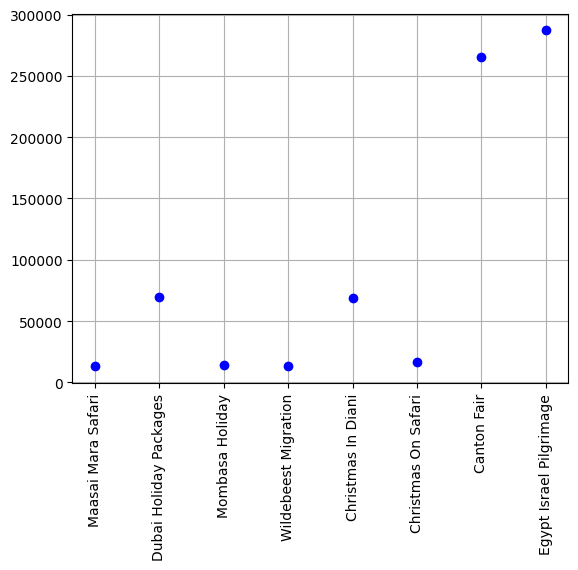

In [59]:
amount=df1['amount']
place=df1['place']
plt.xticks(rotation=90)
plt.plot(place,amount, label='Line Graph', marker='o', linestyle='', color='blue')
plt.grid(True)